In [10]:
from MyLib import show_montage
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import scipy.io

In [8]:
D = scipy.io.loadmat('data/allFaces.mat')
X = D['faces'] # 32256 x 2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
n_persons = D['person'].item() # 38

# print the data information
print('X.shape =', X.shape)
print('y.shape =', y.shape)
print('Total number of images =', X.shape[1])
print('Total number of persons =', n_persons)
print('Image size =', m, 'x', n)
print('Number of images for each person =',y) 
print('Total number of images =', y.sum())

X.shape = (32256, 2410)
y.shape = (38,)
Total number of images = 2410
Total number of persons = 38
Image size = 168 x 192
Number of images for each person = [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
Total number of images = 2410


<font color=yellow>展示所有人（38 人） 的第一張影像圖</font>

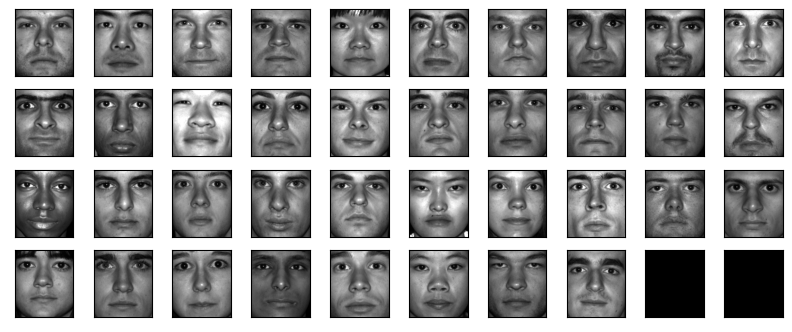

In [5]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
# check all 38 different persons
show_montage(all_diff_persons, n, m, 4,10)

<font color=yellow>SVD 分解</font>

In [11]:
# avgFace = X.mean(axis=1).reshape(-1, 1)
# X_avg = X - np.tile(avgFace, (1, X.shape[1]))
avgFace = X.mean(axis=1)
X_avg = X - avgFace.reshape(-1,1)
# X_avg = X - avgFace[:, np.newaxis]

U, E, VT = svd(X_avg, full_matrices = False)